In [3]:
import tensorflow as tf

# imagine that our data is drawn from a linear function
# y = 3 * hours_studying + 50
TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

In [4]:
# loss funciton
def loss(target_y, predicted_y):
    'MSE'
    return tf.reduce_mean(tf.square(target_y - predicted_y))


## Neural Network Architecture

Lets create a Neural Network class called 'Model' to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex funcitons

In [5]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(8.0)
        self.b = tf.Variable(40.0)
    def __call__(self, x):
        # y = mx + b
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

### Initial Weights

The initial weights in our model were arbitrary. In practice, weights are initialzied randomly.

In [6]:
import matplotlib.pyplot as plt

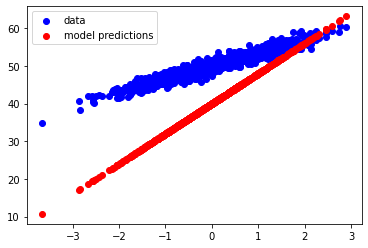

Current loss: 121.284676


In [9]:
plt.scatter(inputs, outputs, c='b', label='data')
plt.scatter(inputs, model(inputs), c='r', label='model predictions')
plt.legend()
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

## Update weights based on Gradient

In [15]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(outputs, model(inputs)) # single value
    dW, db = t.gradient(current_loss, [model.W, model.b]) # backprop, how much does a particular obvs + W + b contribute
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

## Train the network

In [16]:
model = Model()

# store some history of weights
Ws, bs = [], []
epochs = range(15)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(outputs, model(inputs))
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))


Epoch  0: W=8.00 b=40.00 loss=121.28468
Epoch  1: W=7.12 b=42.01 loss=78.05488
Epoch  2: W=6.41 b=43.61 loss=50.36736
Epoch  3: W=5.84 b=44.89 loss=32.63407
Epoch  4: W=5.38 b=45.92 loss=21.27613
Epoch  5: W=5.02 b=46.74 loss=14.00141
Epoch  6: W=4.72 b=47.40 loss=9.34193
Epoch  7: W=4.48 b=47.92 loss=6.35749
Epoch  8: W=4.29 b=48.34 loss=4.44590
Epoch  9: W=4.14 b=48.68 loss=3.22147
Epoch 10: W=4.02 b=48.94 loss=2.43718
Epoch 11: W=3.92 b=49.16 loss=1.93481
Epoch 12: W=3.84 b=49.33 loss=1.61302
Epoch 13: W=3.77 b=49.47 loss=1.40689
Epoch 14: W=3.72 b=49.58 loss=1.27485


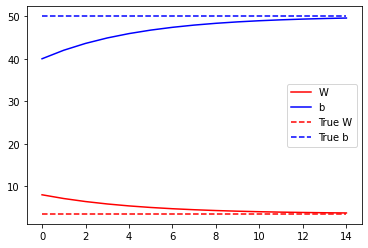

In [17]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

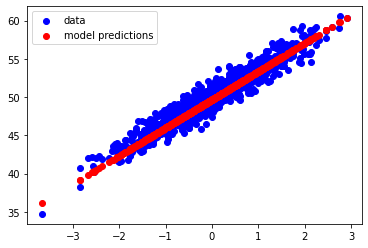

In [19]:
plt.scatter(inputs, outputs, c='b', label='data')
plt.scatter(inputs, model(inputs), c='r', label='model predictions')
plt.legend()
plt.show()

# Batchsize
## Baseline Model


In [37]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

max_pixel_value = 255
X_train = X_train / max_pixel_value
X_test = X_test / max_pixel_value

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [34]:
# our model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=.01):
    opt = SGD(learning_rate=lr)
    model = Sequential([
        Dense(1, activation='relu', input_dim=784),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [36]:
create_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 785       
                                                                 
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [41]:
bt_default = create_model().fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 2s 773us/step - loss: 2.0480 - accuracy: 0.2009 - val_loss: 1.9079 - val_accuracy: 0.2163
Epoch 2/25
1875/1875 [==============================] - 1s 691us/step - loss: 1.8649 - accuracy: 0.2472 - val_loss: 1.8351 - val_accuracy: 0.2706
Epoch 3/25
1875/1875 [==============================] - 1s 666us/step - loss: 1.8041 - accuracy: 0.2830 - val_loss: 1.7828 - val_accuracy: 0.2964
Epoch 4/25
1875/1875 [==============================] - 1s 676us/step - loss: 1.7594 - accuracy: 0.3123 - val_loss: 1.7443 - val_accuracy: 0.3271
Epoch 5/25
1875/1875 [==============================] - 1s 688us/step - loss: 1.7178 - accuracy: 0.3230 - val_loss: 1.7088 - val_accuracy: 0.3295
Epoch 6/25
1875/1875 [==============================] - 1s 685us/step - loss: 1.6831 - accuracy: 0.3231 - val_loss: 1.6822 - val_accuracy: 0.3138
Epoch 7/25
1875/1875 [==============================] - 1s 707us/step - loss: 1.6590 - accuracy: 0.3276 - val_loss: 1.6624 -

In [42]:
bt_small = create_model().fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_test,y_test))

Epoch 1/25
7500/7500 [==============================] - 5s 667us/step - loss: 1.8918 - accuracy: 0.2596 - val_loss: 1.7586 - val_accuracy: 0.2937
Epoch 2/25
7500/7500 [==============================] - 5s 650us/step - loss: 1.7171 - accuracy: 0.3036 - val_loss: 1.7074 - val_accuracy: 0.3149
Epoch 3/25
7500/7500 [==============================] - 5s 652us/step - loss: 1.6872 - accuracy: 0.3137 - val_loss: 1.6827 - val_accuracy: 0.3136
Epoch 4/25
7500/7500 [==============================] - 5s 663us/step - loss: 1.6113 - accuracy: 0.3755 - val_loss: 1.5755 - val_accuracy: 0.3945
Epoch 5/25
7500/7500 [==============================] - 5s 658us/step - loss: 1.5396 - accuracy: 0.3959 - val_loss: 1.5466 - val_accuracy: 0.4002
Epoch 6/25
7500/7500 [==============================] - 5s 652us/step - loss: 1.5120 - accuracy: 0.4022 - val_loss: 1.5538 - val_accuracy: 0.3772
Epoch 7/25
7500/7500 [==============================] - 5s 646us/step - loss: 1.4944 - accuracy: 0.4108 - val_loss: 1.5279 -

In [43]:
bt_large = create_model().fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test,y_test))

Epoch 1/25
118/118 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1071 - val_loss: 2.3024 - val_accuracy: 0.1101
Epoch 2/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3021 - val_accuracy: 0.1127
Epoch 3/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3018 - val_accuracy: 0.1130
Epoch 4/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1133
Epoch 5/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3015 - val_accuracy: 0.1134
Epoch 6/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/25
118/118 [==============================] - 0s 1ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 

In [56]:
import seaborn as sns
import pandas as pd

batch_sizes = []
for exp, result in zip([bt_default, bt_small, bt_large], ['32_', '8_', '512_']):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.reset_index(drop=True, inplace=True)
df.shape
df

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.047978,0.200883,1.907864,0.2163,0,32_
1,1.864856,0.247217,1.835067,0.2706,1,32_
2,1.804099,0.283033,1.782820,0.2964,2,32_
3,1.759385,0.312283,1.744332,0.3271,3,32_
4,1.717764,0.323017,1.708817,0.3295,4,32_
...,...,...,...,...,...,...
70,2.301172,0.112367,2.301051,0.1135,20,512_
71,2.301170,0.112367,2.301045,0.1135,21,512_
72,2.301167,0.112367,2.301041,0.1135,22,512_
73,2.301166,0.112367,2.301032,0.1135,23,512_


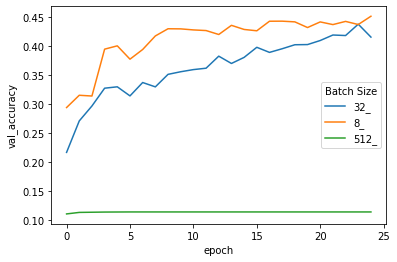

In [57]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

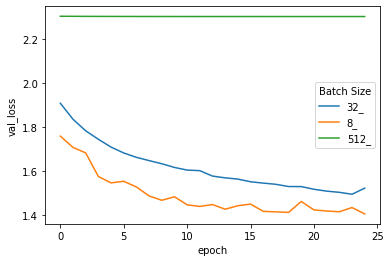

In [58]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

## learning rate

In [61]:
lr_default = create_model().fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 2s 752us/step - loss: 2.1896 - accuracy: 0.1838 - val_loss: 2.0584 - val_accuracy: 0.2301
Epoch 2/25
1875/1875 [==============================] - 1s 720us/step - loss: 1.9858 - accuracy: 0.2368 - val_loss: 1.8988 - val_accuracy: 0.2506
Epoch 3/25
1875/1875 [==============================] - 1s 717us/step - loss: 1.8159 - accuracy: 0.2792 - val_loss: 1.7556 - val_accuracy: 0.2888
Epoch 4/25
1875/1875 [==============================] - 1s 680us/step - loss: 1.7198 - accuracy: 0.2932 - val_loss: 1.6983 - val_accuracy: 0.2899
Epoch 5/25
1875/1875 [==============================] - 1s 699us/step - loss: 1.6766 - accuracy: 0.2970 - val_loss: 1.6662 - val_accuracy: 0.2967
Epoch 6/25
1875/1875 [==============================] - 1s 711us/step - loss: 1.6532 - accuracy: 0.3002 - val_loss: 1.6522 - val_accuracy: 0.3089
Epoch 7/25
1875/1875 [==============================] - 1s 724us/step - loss: 1.6387 - accuracy: 0.3054 - val_loss: 1.6360 -

In [62]:
lr_high = create_model(lr=.75).fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 2s 740us/step - loss: 2.2592 - accuracy: 0.1261 - val_loss: 2.3116 - val_accuracy: 0.1009
Epoch 2/25
1875/1875 [==============================] - 1s 700us/step - loss: 2.3066 - accuracy: 0.1048 - val_loss: 2.3067 - val_accuracy: 0.0980
Epoch 3/25
1875/1875 [==============================] - 1s 721us/step - loss: 2.3066 - accuracy: 0.1057 - val_loss: 2.3032 - val_accuracy: 0.1028
Epoch 4/25
1875/1875 [==============================] - 1s 677us/step - loss: 2.3066 - accuracy: 0.1046 - val_loss: 2.3086 - val_accuracy: 0.1135
Epoch 5/25
1875/1875 [==============================] - 1s 684us/step - loss: 2.3065 - accuracy: 0.1038 - val_loss: 2.3065 - val_accuracy: 0.1135
Epoch 6/25
1875/1875 [==============================] - 1s 674us/step - loss: 2.3067 - accuracy: 0.1040 - val_loss: 2.3089 - val_accuracy: 0.1009
Epoch 7/25
1875/1875 [==============================] - 1s 684us/step - loss: 2.3069 - accuracy: 0.1060 - val_loss: 2.3080 -

In [63]:
lr_low = create_model(lr=.0001).fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 2s 754us/step - loss: 2.3041 - accuracy: 0.0892 - val_loss: 2.3019 - val_accuracy: 0.0857
Epoch 2/25
1875/1875 [==============================] - 1s 686us/step - loss: 2.3006 - accuracy: 0.0890 - val_loss: 2.2983 - val_accuracy: 0.0890
Epoch 3/25
1875/1875 [==============================] - 1s 685us/step - loss: 2.2970 - accuracy: 0.0929 - val_loss: 2.2944 - val_accuracy: 0.0929
Epoch 4/25
1875/1875 [==============================] - 1s 744us/step - loss: 2.2931 - accuracy: 0.0977 - val_loss: 2.2901 - val_accuracy: 0.0977
Epoch 5/25
1875/1875 [==============================] - 1s 691us/step - loss: 2.2887 - accuracy: 0.1023 - val_loss: 2.2854 - val_accuracy: 0.1026
Epoch 6/25
1875/1875 [==============================] - 1s 685us/step - loss: 2.2840 - accuracy: 0.1053 - val_loss: 2.2804 - val_accuracy: 0.1054
Epoch 7/25
1875/1875 [==============================] - 1s 676us/step - loss: 2.2788 - accuracy: 0.1080 - val_loss: 2.2749 -

In [65]:
learning_rate = []
for exp, result in zip([lr_default, lr_low, lr_high], ['.01_', '.0001_', '.75_']):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rate.append(df)
df = pd.concat(learning_rate)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.reset_index(drop=True, inplace=True)
df.shape
df

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.189637,0.183767,2.058404,0.2301,0,.01_
1,1.985781,0.236767,1.898825,0.2506,1,.01_
2,1.815940,0.279183,1.755566,0.2888,2,.01_
3,1.719844,0.293150,1.698295,0.2899,3,.01_
4,1.676646,0.296983,1.666174,0.2967,4,.01_
...,...,...,...,...,...,...
70,2.306912,0.103783,2.304743,0.1028,20,.75_
71,2.306759,0.104650,2.303151,0.1135,21,.75_
72,2.306914,0.104700,2.307668,0.1135,22,.75_
73,2.306241,0.103133,2.309517,0.0974,23,.75_


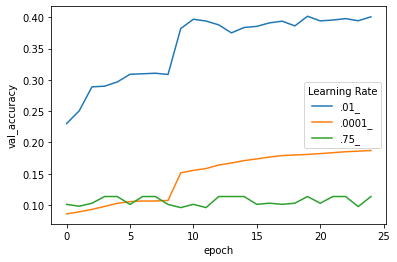

In [66]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

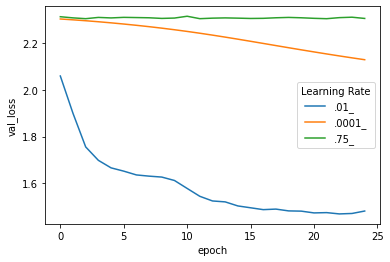

In [68]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

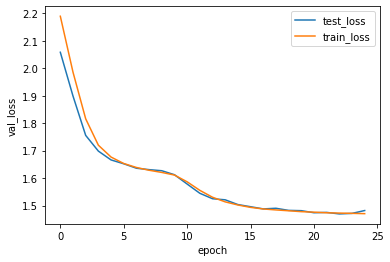

In [73]:
sns.lineplot(x='epoch', y='val_loss', data=df[df['Learning Rate']=='.01_'], label='test_loss')
sns.lineplot(x='epoch', y='loss', data=df[df['Learning Rate']=='.01_'], label='train_loss');

<AxesSubplot:xlabel='epoch', ylabel='val_accuracy'>

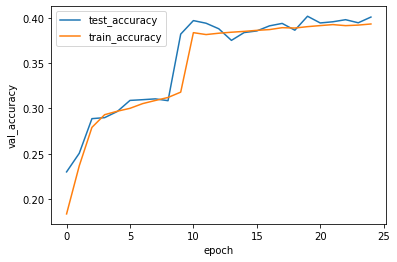

In [75]:
sns.lineplot(x='epoch', y='val_accuracy', data=df[df['Learning Rate']=='.01_'], label='test_accuracy')
sns.lineplot(x='epoch', y='accuracy', data=df[df['Learning Rate']=='.01_'], label='train_accuracy')